# TITANIC


Students will be separated into two groups & able to truly practice their skills, emphasizing on visualization & modeling with machine learning, with a live Kaggle competition. During this time working with others, students will also be encouraged to identify the gaps in their skills, especially in analysis & modeling, in the project & review as much as possible moving forward to other projects in the continual sessions.

We use classifcation models for questions with yes-no answers.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df_train=pd.read_csv('ttrain.csv')
df_test=pd.read_csv('ttest.csv')

In [3]:
df_train = pd.read_csv("ttrain.csv")
df_test = pd.read_csv("ttest.csv")
df_train['source'] = 'train'
df_test['source'] = 'test'
df = pd.concat([df_train, df_test], ignore_index=True)

# EDA

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,source
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train


In [5]:
df.shape

(1309, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  source       1309 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 133.1+ KB


In [7]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
source            0
dtype: int64

In [8]:
df.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.028814,-0.055224,0.008942,0.031428
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558629
Age,0.028814,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.055224,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160238
Parch,0.008942,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221539
Fare,0.031428,0.257307,-0.558629,0.178740,0.160238,0.221539,1.000000


<Axes: xlabel='Survived', ylabel='count'>

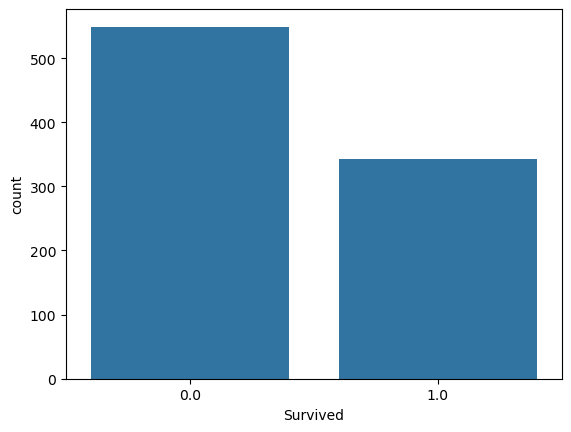

In [9]:
sns.countplot(x=df['Survived'])

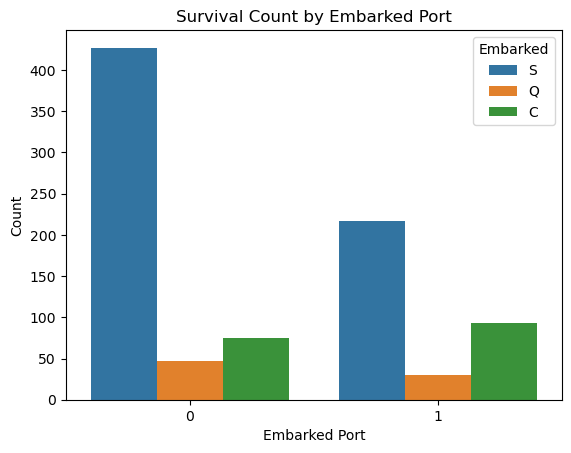

In [10]:
sns.countplot(x='Survived', hue='Embarked', data=df_train)
plt.title('Survival Count by Embarked Port')
plt.xlabel('Embarked Port')
plt.ylabel('Count')
plt.show()

# Feature Engineering

In [11]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [12]:
df['Embarked'].fillna(df['Embarked'].mode(),inplace=True)

In [13]:
df['Fare'].fillna(df['Fare'].median(),inplace=True)

In [14]:
df.drop(columns=['Cabin','Name','Ticket'], inplace=True)

In [15]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,source
0,1,0.0,3,male,22.0,1,0,7.2500,S,train
1,2,1.0,1,female,38.0,1,0,71.2833,C,train
2,3,1.0,3,female,26.0,0,0,7.9250,S,train
3,4,1.0,1,female,35.0,1,0,53.1000,S,train
4,5,0.0,3,male,35.0,0,0,8.0500,S,train


In [16]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)

In [17]:
df_train = df[df['source'] == 'train'].drop(columns=['source'])
df_test = df[df['source'] == 'test'].drop(columns=['Survived', 'source'])

In [18]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 891 to 1308
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Age          418 non-null    float64
 2   SibSp        418 non-null    int64  
 3   Parch        418 non-null    int64  
 4   Fare         418 non-null    float64
 5   Sex_male     418 non-null    bool   
 6   Embarked_Q   418 non-null    bool   
 7   Embarked_S   418 non-null    bool   
 8   Pclass_2     418 non-null    bool   
 9   Pclass_3     418 non-null    bool   
dtypes: bool(5), float64(2), int64(3)
memory usage: 21.6 KB


In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    float64
 2   Age          891 non-null    float64
 3   SibSp        891 non-null    int64  
 4   Parch        891 non-null    int64  
 5   Fare         891 non-null    float64
 6   Sex_male     891 non-null    bool   
 7   Embarked_Q   891 non-null    bool   
 8   Embarked_S   891 non-null    bool   
 9   Pclass_2     891 non-null    bool   
 10  Pclass_3     891 non-null    bool   
dtypes: bool(5), float64(3), int64(3)
memory usage: 53.1 KB


# Modelling

In [20]:
x = df_train.drop(columns=['Survived'])
y = df_train['Survived']

In [21]:
x.shape

(891, 10)

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=20,random_state=42)

In [23]:

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier


def algo_test(x,y):
        #Bütün modelleri tanımlıyorum
        gnb=GaussianNB()
        bnb=BernoulliNB()
        lr=LogisticRegression()
        dt=DecisionTreeClassifier()
        rf=RandomForestClassifier()
        gbc=GradientBoostingClassifier()
        knc=KNeighborsClassifier()
        

       
        
        algos=[gnb,bnb,lr,dt,rf,gbc,knc]
        algo_names=['GaussianNB','BernoulliNB','LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingClassifier','KNeighborsClassifier']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)
        
        confusion_matrixes= []
        classification_reports= []
        accuracy_scores=[]        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            classification_reports.append(classification_report(p , y_test))
            confusion_matrixes.append(confusion_matrix(p , y_test))
            accuracy_scores.append(accuracy_score(p , y_test))

        for i in range(len(algo_names)):
            print('Algorithm:'+ '\n' , algo_names[i])
            print('Confusion Matrix:'+ '\n' , confusion_matrixes[i])
            print('Classification Report: '+ '\n' , classification_reports[i])
            print('Accuracy Score:'+ '\n' , accuracy_scores[i])
            print('************************************************************')

In [24]:
algo_test(x,y)

Algorithm:
 GaussianNB
Confusion Matrix:
 [[83 20]
 [22 54]]
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.79      0.81      0.80       103
         1.0       0.73      0.71      0.72        76

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.76      0.77      0.76       179

Accuracy Score:
 0.7653631284916201
************************************************************
Algorithm:
 BernoulliNB
Confusion Matrix:
 [[89 24]
 [16 50]]
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.85      0.79      0.82       113
         1.0       0.68      0.76      0.71        66

    accuracy                           0.78       179
   macro avg       0.76      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179

Accuracy Score:
 0.776536312849162
*****************************************

In [25]:
rfc=RandomForestClassifier()
rfc.fit(x,y)

RandomForestClassifier()

In [29]:
pred=rfc.predict(df_test)
PassengerId=df_test['PassengerId']

In [30]:
submission = pd.DataFrame({
    "PassengerId": PassengerId,
    "Survived": pred
})

submission['Survived'] = submission['Survived'].astype('int64')

In [31]:
submission.to_csv('submission.csv', index=False)

In [32]:
submission.sample(10)

,PassengerId,Survived
921,922,0
1295,1296,1
1120,1121,0
1281,1282,0
1071,1072,0
1210,1211,0
942,943,0
952,953,0
957,958,1
984,985,0
